In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math

In [2]:
height = 64
width = 128
channel = 3

In [3]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB\\extra_100dB'
noisy_mix_path = 'D:\\intern\\classified_data\\noisy_data\\noisy_mix'

In [4]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)
noisy_mix_files = os.listdir(noisy_mix_path)

In [5]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)
noisy_mix = np.zeros((len(noisy_mix_files), height, width, channel), dtype=np.float32)

In [6]:
n = 0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 115.42it/s]


In [7]:
n=0
for i in tqdm(noisy_15dB_files):
    img = cv2.imread(noisy_15dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_15dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 112.07it/s]


In [8]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.88it/s]


In [9]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 85.17it/s]


In [10]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 117.39it/s]


In [11]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.01it/s]


In [12]:
n=0
for i in tqdm(noisy_mix_files):
    img = cv2.imread(noisy_mix_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_mix[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 138.58it/s]


In [13]:
print(clean_data.shape)
print(noisy_15dB.shape)
print(noisy_20dB.shape)
print(noisy_25dB.shape)
print(noisy_30dB.shape)
print(noisy_100dB.shape)
print(noisy_mix.shape)

(500, 64, 128, 3)
(500, 64, 128, 3)
(500, 64, 128, 3)
(500, 64, 128, 3)
(500, 64, 128, 3)
(500, 64, 128, 3)
(500, 64, 128, 3)


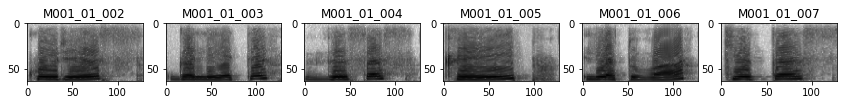

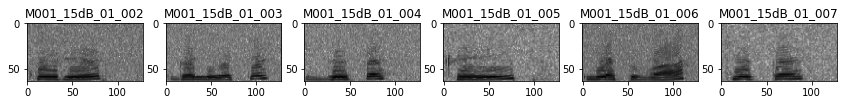

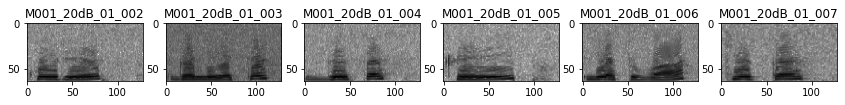

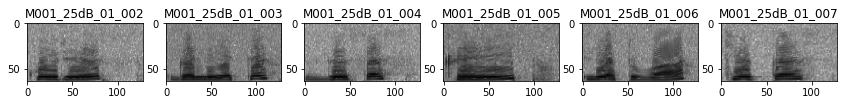

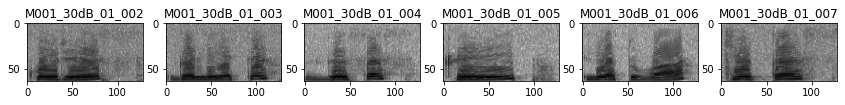

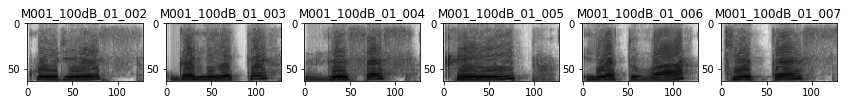

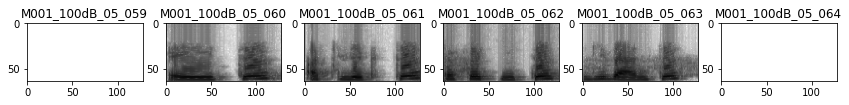

In [14]:
# Displaying clean images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{clean_data_files[i].split('.')[0]}")
    plt.imshow(clean_data[i])
plt.show()

# Displaying noisy_15dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_15dB_files[i].split('.')[0]}")
    plt.imshow(noisy_15dB[i])
plt.show()

# Displaying noisy_20dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_20dB_files[i].split('.')[0]}")
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying noisy_25dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_25dB_files[i].split('.')[0]}")
    plt.imshow(noisy_25dB[i])
plt.show()

# Displaying noisy_30dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_30dB_files[i].split('.')[0]}")
    plt.imshow(noisy_30dB[i])
plt.show()

# Displaying noisy_100dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_100dB_files[i].split('.')[0]}")
    plt.imshow(noisy_100dB[i])
plt.show()

# Displaying noisy mix images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title(f"{noisy_mix_files[i].split('.')[0]}")
    plt.imshow(noisy_mix[i])
plt.show()

In [15]:
model = Sequential([    
    # encoder
    Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu 
    
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 128)      3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 128, 128)      147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 128, 128)      147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 64, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 64, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 64, 64)        3

In [17]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [18]:
history = model.fit(noisy_25dB, noisy_20dB,
          validation_split=0.2,
          batch_size=16,
          epochs=50,
        )

Train on 400 samples, validate on 100 samples
Epoch 1/50
400/400 [==============================] - 196s 490ms/sample - loss: 0.0147 - accuracy: 0.0090 - val_loss: 0.0140 - val_accuracy: 0.0077
Epoch 2/50
400/400 [==============================] - 196s 489ms/sample - loss: 0.0140 - accuracy: 0.0681 - val_loss: 0.0133 - val_accuracy: 0.5252
Epoch 3/50
400/400 [==============================] - 210s 524ms/sample - loss: 0.0108 - accuracy: 0.3143 - val_loss: 0.0095 - val_accuracy: 0.3529
Epoch 4/50
400/400 [==============================] - 184s 460ms/sample - loss: 0.0101 - accuracy: 0.3011 - val_loss: 0.0095 - val_accuracy: 0.1992
Epoch 5/50
400/400 [==============================] - 161s 404ms/sample - loss: 0.0097 - accuracy: 0.2796 - val_loss: 0.0091 - val_accuracy: 0.4658
Epoch 6/50
400/400 [==============================] - 176s 440ms/sample - loss: 0.0095 - accuracy: 0.2819 - val_loss: 0.0089 - val_accuracy: 0.2820
Epoch 7/50
400/400 [==============================] - 204s 509ms/s

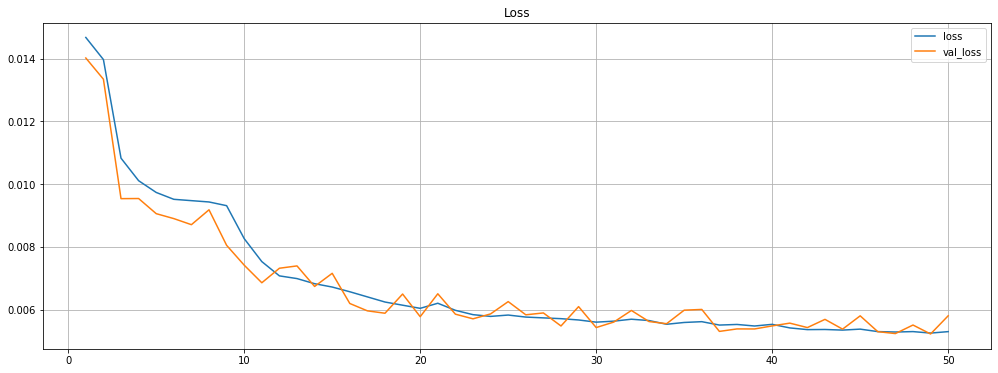

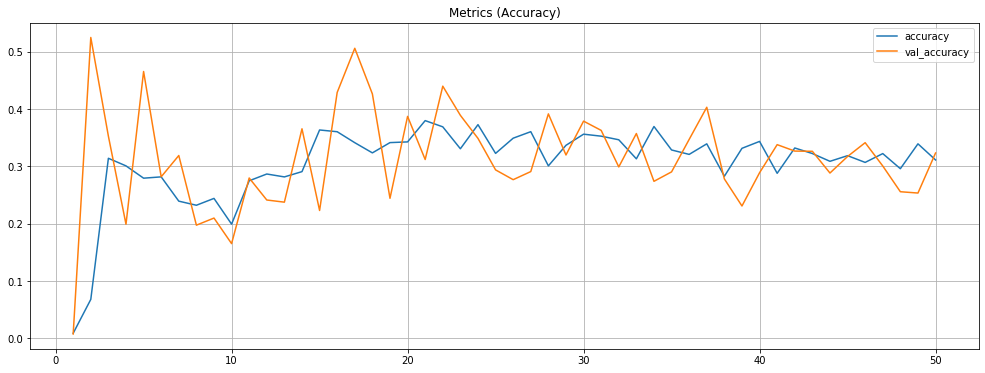

In [19]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
predicted_clean = model.predict(clean_data)
predicted_15dB = model.predict(noisy_15dB)
predicted_20dB = model.predict(noisy_20dB)
predicted_25dB = model.predict(noisy_25dB)
predicted_30dB = model.predict(noisy_30dB)
predicted_100dB = model.predict(noisy_100dB)
predicted_mix = model.predict(noisy_mix)

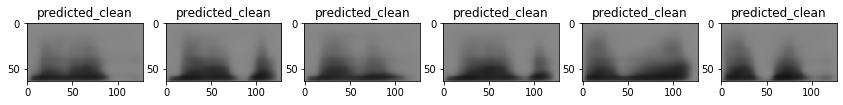

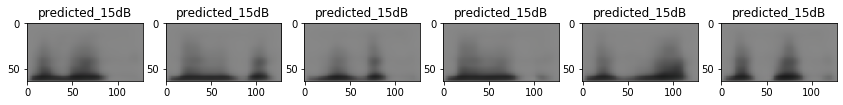

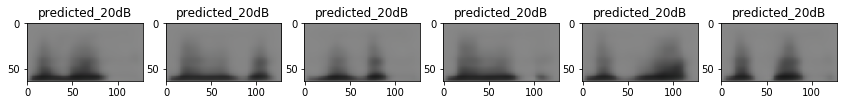

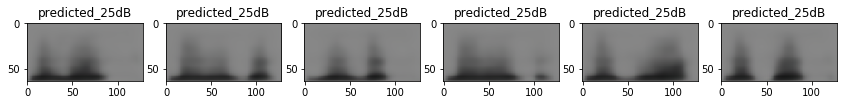

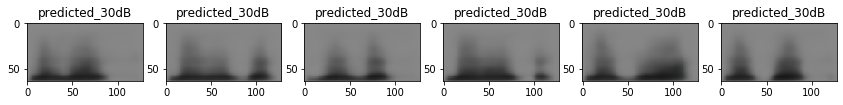

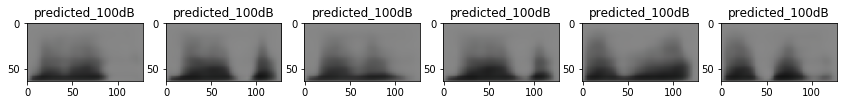

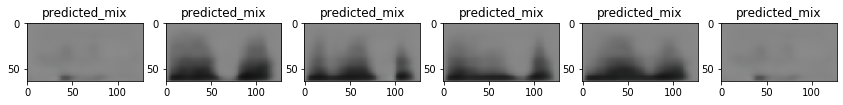

In [21]:
# Displaying predicted_clean images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_clean')
    plt.imshow(predicted_clean[i])
plt.show()

# Displaying predicted_15dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_15dB')
    plt.imshow(predicted_15dB[i])
plt.show()

# Displaying predicted_20dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_20dB')
    plt.imshow(predicted_20dB[i])
plt.show()

# Displaying predicted_25dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_25dB')
    plt.imshow(predicted_25dB[i])
plt.show()

# Displaying predicted_30dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_30dB')
    plt.imshow(predicted_30dB[i])
plt.show()

# Displaying predicted_100dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_100dB')
    plt.imshow(predicted_100dB[i])
plt.show()

# Displaying predicted_mix images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    ax.set_title('predicted_mix')
    plt.imshow(predicted_mix[i])
plt.show()

In [22]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [23]:
psnr_clean = []
psnr_15dB = []
psnr_20dB = []
psnr_25dB = []
psnr_30dB = []
psnr_100dB = []
psnr_mix = []

In [24]:
#
#
#
#
#
#
#
#
#

In [25]:
# PSNR on clean data
n=0
for i in range(len(predicted_clean)):
    n = n+1
    psnr = PSNR(clean_data[i], predicted_clean[i])
    psnr_clean.append(psnr)

print(f'{n} PSNR for (clean_data, predicted_clean) calculated.')
print(f'avg PSNR for clean_data :{PSNR(clean_data, predicted_clean)}')
print(f'max : {max(psnr_clean)}')
print(f'min : {min(psnr_clean)}')

500 PSNR for (clean_data, predicted_clean) calculated.
avg PSNR for clean_data :65.28381607424303
max : 69.08380321996272
min : 62.43267641478709


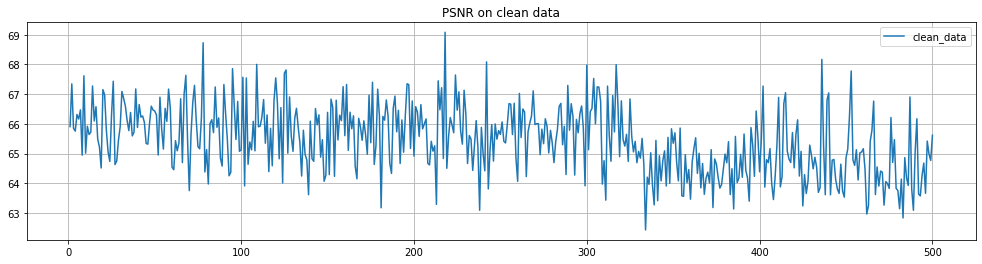

In [26]:
# Displaying psnr on clean data

xepochs = range(1,len(predicted_clean) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_clean, label = 'clean_data')
plt.title('PSNR on clean data')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#
#
#
#
#
#
#
#
#

In [28]:
# PSNR on 15dB
n=0
for i in range(len(predicted_15dB)):
    n = n + 1
    psnr = PSNR(noisy_15dB[i], predicted_15dB[i])
    psnr_15dB.append(psnr)
    

print(f'{n} PSNR for (noisy_15dB, predicted_15dB) calculated.')
print(f'avg PSNR for 15dB :{PSNR(noisy_15dB, predicted_15dB)}')
print(f'max : {max(psnr_15dB)}')
print(f'min : {min(psnr_15dB)}')

500 PSNR for (noisy_15dB, predicted_15dB) calculated.
avg PSNR for 15dB :70.77485366280706
max : 72.90077157912515
min : 64.49731700185369


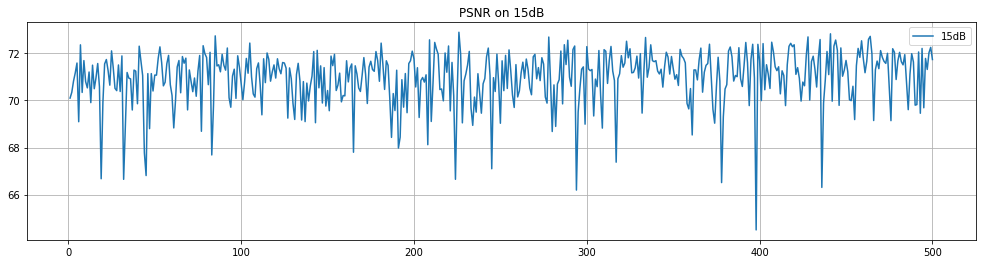

In [29]:
# Displaying psnr on 15dB data

xepochs = range(1,len(predicted_15dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_15dB, label = '15dB')
plt.title('PSNR on 15dB')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
#
#
#
#
#
#
#
#
#

In [31]:
# PSNR on 20dB
n=0
for i in range(len(predicted_20dB)):
    n = n + 1
    psnr = PSNR(noisy_20dB[i], predicted_20dB[i])
    psnr_20dB.append(psnr)
    

print(f'{n} PSNR for (noisy_20dB, predicted_20dB) calculated.')
print(f'avg PSNR for 20dB :{PSNR(noisy_20dB, predicted_20dB)}')
print(f'max : {max(psnr_20dB)}')
print(f'min : {min(psnr_20dB)}')

500 PSNR for (noisy_20dB, predicted_20dB) calculated.
avg PSNR for 20dB :70.89828863228274
max : 73.33692656558577
min : 66.43489487335813


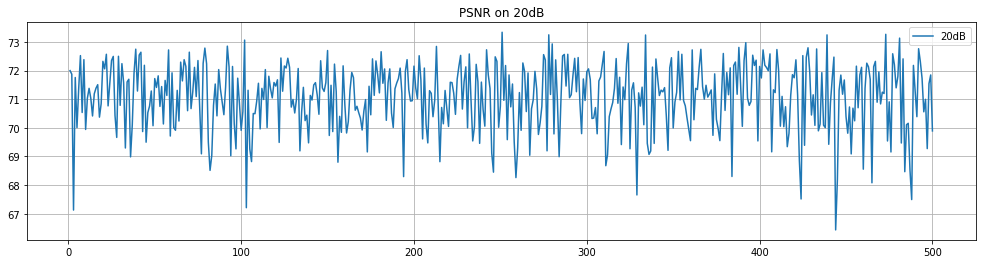

In [32]:
# Displaying psnr on 20dB data

xepochs = range(1,len(predicted_20dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_20dB, label = '20dB')
plt.title('PSNR on 20dB')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
#
#
#
#
#
#
#
#
#

In [34]:
# PSNR on 25dB
n=0
for i in range(len(predicted_25dB)):
    n = n+1
    psnr = PSNR(noisy_25dB[i], predicted_25dB[i])
    psnr_25dB.append(psnr) 

print(f'{n} PSNR for (noisy_25dB, predicted_25dB) calculated.')
print(f'avg PSNR for 25dB :{PSNR(noisy_25dB, predicted_25dB)}')
print(f'max : {max(psnr_25dB)}')
print(f'min : {min(psnr_25dB)}')

500 PSNR for (noisy_25dB, predicted_25dB) calculated.
avg PSNR for 25dB :70.05108670612513
max : 73.61789018168066
min : 65.78182621975371


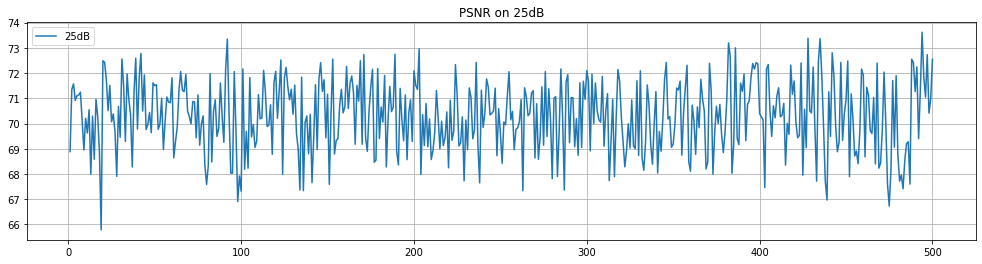

In [35]:
# Displaying psnr on 25dB data

xepochs = range(1,len(predicted_25dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_25dB, label = '25dB')
plt.title('PSNR on 25dB')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
#
#
#
#
#
#
#
#
#

In [37]:
# PSNR on 30dB
n=0
for i in range(len(predicted_30dB)):
    n = n+1
    psnr = PSNR(noisy_30dB[i], predicted_30dB[i])
    psnr_30dB.append(psnr)

print(f'{n} PSNR for (noisy_30dB, predicted_30dB) calculated.')
print(f'avg PSNR for 30dB :{PSNR(noisy_30dB, predicted_30dB)}')
print(f'max : {max(psnr_30dB)}')
print(f'min : {min(psnr_30dB)}')

500 PSNR for (noisy_30dB, predicted_30dB) calculated.
avg PSNR for 30dB :69.00786511069289
max : 73.37005541734874
min : 65.04085459054413


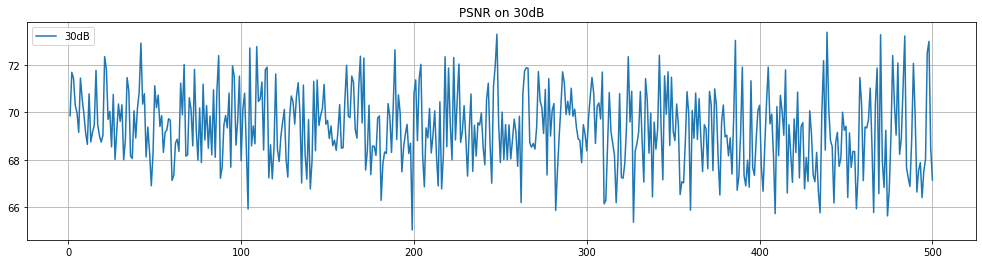

In [38]:
# Displaying psnr on 30dB data

xepochs = range(1,len(predicted_30dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_30dB, label = '30dB')
plt.title('PSNR on 30dB')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
#
#
#
#
#
#
#
#
#

In [40]:
# PSNR on 100dB
n=0
for i in range(len(predicted_100dB)):
    n = n+1
    psnr = PSNR(noisy_100dB[i], predicted_100dB[i])
    psnr_100dB.append(psnr)

print(f'{n} PSNR for (noisy_100dB, predicted_100dB) calculated.')
print(f'avg PSNR for 100dB :{PSNR(noisy_100dB, predicted_100dB)}')
print(f'max : {max(psnr_100dB)}')
print(f'min : {min(psnr_100dB)}')

500 PSNR for (noisy_100dB, predicted_100dB) calculated.
avg PSNR for 100dB :60.96779919088637
max : 69.71096701407502
min : 54.538371228924305


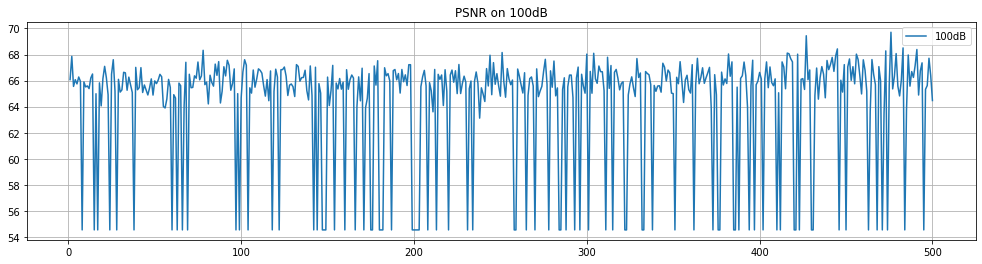

In [41]:
# Displaying psnr on 100dB data

xepochs = range(1,len(predicted_100dB) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_100dB, label = '100dB')
plt.title('PSNR on 100dB')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
#
#
#
#
#
#
#
#
#

In [43]:
# PSNR on noisy mix data
n=0
for i in range(len(predicted_mix)):
    n = n+1
    psnr = PSNR(noisy_mix[i], predicted_mix[i])
    psnr_mix.append(psnr)

print(f'{n} PSNR for (noisy_mix, predicted_mix) calculated.')
print(f'avg PSNR for noisy :{PSNR(noisy_mix, predicted_15dB)}')
print(f'max : {max(psnr_mix)}')
print(f'min : {min(psnr_mix)}')

500 PSNR for (noisy_mix, predicted_mix) calculated.
avg PSNR for noisy :64.53980109716301
max : 73.73584552240403
min : 54.538371228924305


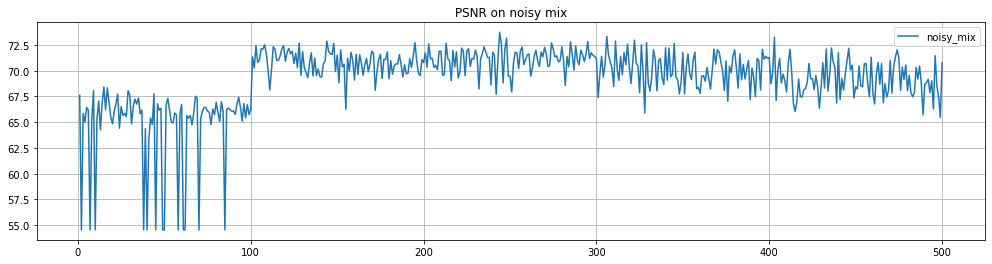

In [44]:
# Displaying psnr on noisy mix

xepochs = range(1,len(predicted_mix) + 1)

plt.figure(figsize=(17,4))
plt.plot(xepochs, psnr_mix, label = 'noisy_mix')
plt.title('PSNR on noisy mix')
plt.grid(True)
plt.legend()
plt.show()